## 📌 Synthetic Data Generation for Enhanced Approach
In this step, we generate a rich synthetic dataset tailored for our case study, featuring 500 samples and a comprehensive set of 50 numerical features, along with additional categorical, binary, engagement-based, and credit-related features. This diverse synthetic data simulates realistic company scenarios across loan approvals, fraud detection, and marketing tasks, providing a strong foundation for exploring sophisticated privacy-preserving methods.


In [36]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of rows (samples) and columns (features)
num_samples = 500  # Can be adjusted based on needs
num_features = 50  # Creating a large number of features

# Generate synthetic numerical features
synthetic_data = pd.DataFrame(
    np.random.randn(num_samples, num_features),  # Random normal distribution
    columns=[f"feature_{i+1}" for i in range(num_features)]
)

# Adding categorical features
categories = ["Low", "Medium", "High"]
synthetic_data["income_bracket"] = np.random.choice(categories, num_samples)
synthetic_data["marital_status"] = np.random.choice(["Single", "Married", "Divorced"], num_samples)
synthetic_data["education_level"] = np.random.choice(["High School", "Bachelor's", "Master's", "PhD"], num_samples)

# Adding binary features (e.g., Fraudulent transaction, Loan Default)
synthetic_data["fraudulent_transaction"] = np.random.choice([0, 1], num_samples)
synthetic_data["loan_default"] = np.random.choice([0, 1], num_samples)

# Adding engagement-based features (for marketing model)
synthetic_data["click_through_rate"] = np.random.rand(num_samples) * 100
synthetic_data["ad_engagement_score"] = np.random.rand(num_samples) * 10

# Adding credit card-related features
synthetic_data["credit_utilization"] = np.random.rand(num_samples) * 100
synthetic_data["credit_score"] = np.random.randint(300, 850, num_samples)

# Show sample data
print(synthetic_data.head())

# Save the dataset for future use
synthetic_data.to_csv("synthetic_ml_feature_dataset.csv", index=False)


   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1   0.324084  -0.385082  -0.676922   0.611676   1.031000   0.931280   
2  -1.415371  -0.420645  -0.342715  -0.802277  -0.161286   0.404051   
3   0.250493   0.346448  -0.680025   0.232254   0.293072  -0.714351   
4   0.357787   0.560785   1.083051   1.053802  -1.377669  -0.937825   

   feature_7  feature_8  feature_9  feature_10  ...  feature_50  \
0   1.579213   0.767435  -0.469474    0.542560  ...   -1.763040   
1  -0.839218  -0.309212   0.331263    0.975545  ...   -0.234587   
2   1.886186   0.174578   0.257550   -0.074446  ...    0.296985   
3   1.865775   0.473833  -1.191303    0.656554  ...   -1.142970   
4   0.515035   0.513786   0.515048    3.852731  ...    0.404982   

   income_bracket  marital_status  education_level  fraudulent_transaction  \
0             Low          Single       Bachelor's                       0   
1            H

## 🗂️ Creating the Feature Pool
We structure our synthetic features into meaningful groups, creating a clear "feature pool." This feature pool categorizes features based on their usage in typical company ML models such as financial decision-making, fraud detection, demographic segmentation, and behavioral analytics. Organizing features this way supports strategic feature selection and privacy optimization downstream.


In [37]:
import pandas as pd

# Step 1: Feature Pool Construction

# Defining the feature pool as a dictionary where features are categorized
feature_pool = {
    "financial_features": [
        "credit_score", "credit_utilization", "income_bracket", "loan_default",
        "debt_to_income_ratio", "monthly_expenses", "savings_balance"
    ],
    "fraud_detection_features": [
        "transaction_amount", "transaction_frequency", "fraudulent_transaction",
        "merchant_category", "device_type", "account_age", "unusual_spending_pattern"
    ],
    "marketing_features": [
        "click_through_rate", "ad_engagement_score", "purchase_history",
        "user_segment", "time_spent_on_site", "past_campaign_response"
    ],
    "demographic_features": [
        "marital_status", "education_level", "employment_status",
        "household_size", "region", "age_group"
    ],
    "behavioral_features": [
        "online_activity_score", "social_media_engagement",
        "customer_loyalty_index", "preferred_payment_method"
    ]
}

# Convert feature pool into a DataFrame for better visualization
feature_pool_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in feature_pool.items()]))

# Display the Feature Pool
print("Feature Pool Structure:")
print(feature_pool_df)

# Saving the Feature Pool for reference
feature_pool_df.to_csv("feature_pool.csv", index=False)


Feature Pool Structure:
     financial_features  fraud_detection_features      marketing_features  \
0          credit_score        transaction_amount      click_through_rate   
1    credit_utilization     transaction_frequency     ad_engagement_score   
2        income_bracket    fraudulent_transaction        purchase_history   
3          loan_default         merchant_category            user_segment   
4  debt_to_income_ratio               device_type      time_spent_on_site   
5      monthly_expenses               account_age  past_campaign_response   
6       savings_balance  unusual_spending_pattern                     NaN   

  demographic_features       behavioral_features  
0       marital_status     online_activity_score  
1      education_level   social_media_engagement  
2    employment_status    customer_loyalty_index  
3       household_size  preferred_payment_method  
4               region                       NaN  
5            age_group                       NaN  
6 

## 🌐 Constructing and Visualizing the Knowledge Graph
Here, we construct a Knowledge Graph (KG) that visually represents dependencies and relationships between feature categories and their specific features. Using a directed graph, we clearly illustrate feature interconnections and categories. This knowledge graph serves as a structural basis for informed feature selection, revealing potential dependencies and opportunities for optimizing feature usage across ML tasks.


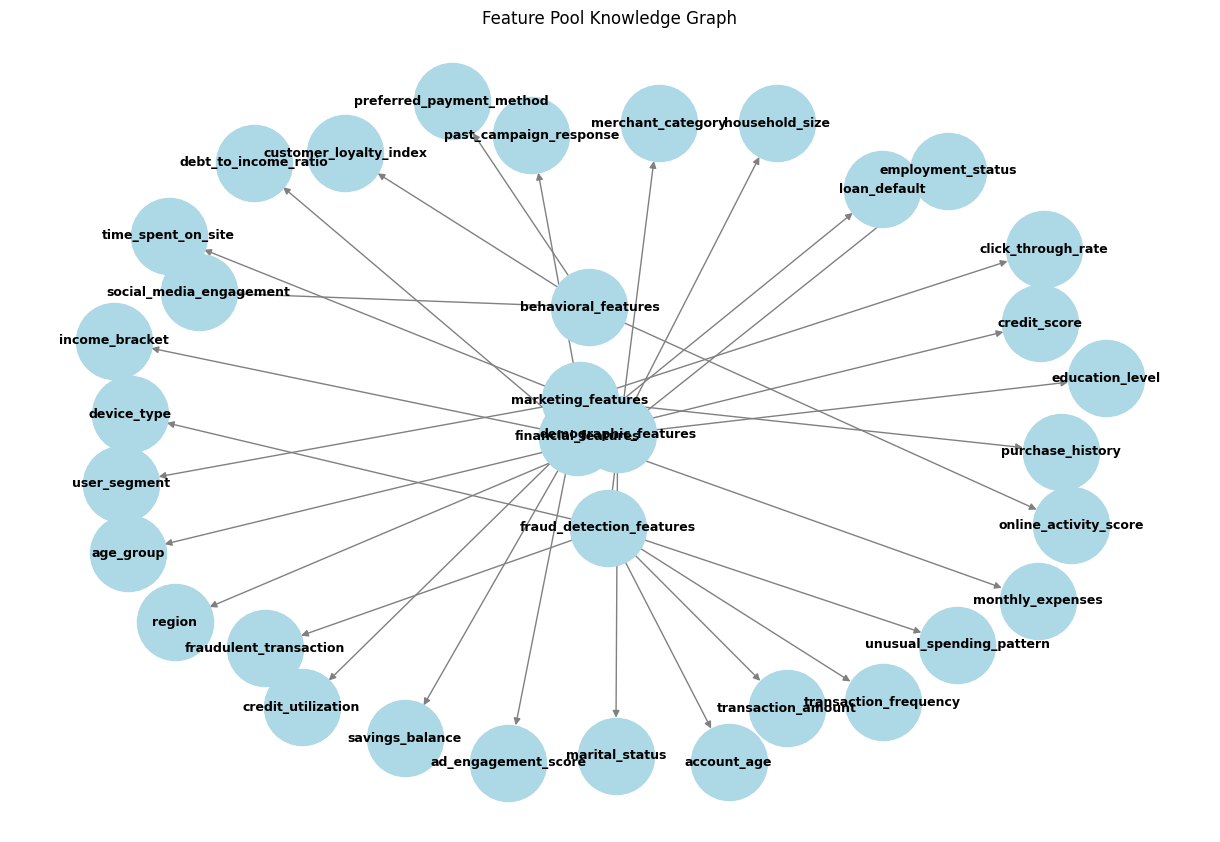

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 2: Constructing the Knowledge Graph (KG)

# Creating a directed graph
KG = nx.DiGraph()

# Adding nodes (features) and connecting them based on dependencies
for category, features in feature_pool.items():
    KG.add_node(category, type="Category")  # Category node
    for feature in features:
        KG.add_node(feature, type="Feature")  # Feature node
        KG.add_edge(category, feature)  # Connect category to its features

# Visualizing the Knowledge Graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(KG, seed=42)  # Positioning nodes
nx.draw(KG, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=9, font_weight="bold")
plt.title("Feature Pool Knowledge Graph")
plt.show()


## 🔍 SHAP Analysis for Loan Default Prediction
We employ SHAP (SHapley Additive exPlanations) with an XGBoost classifier to identify the most impactful features in predicting loan defaults. SHAP helps interpret model decisions by highlighting each feature's contribution, facilitating transparent and explainable feature selection to enhance model reliability and privacy.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:31:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


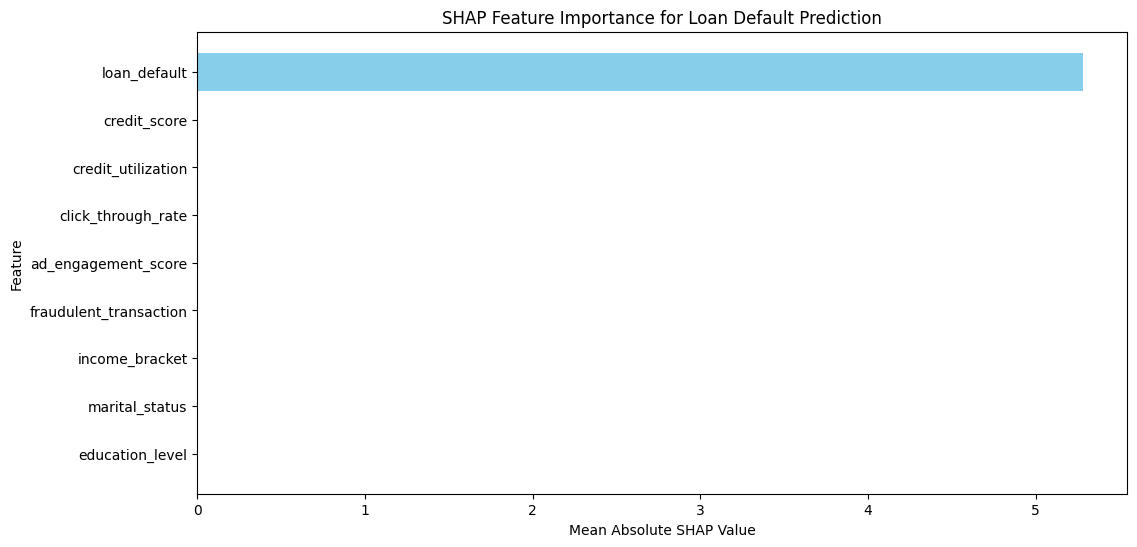

SHAP values saved as 'shap_feature_importance.csv'


In [39]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Check which features exist in the dataset
available_features = set(synthetic_data.columns)

numerical_features = [
    "credit_score", "credit_utilization", "loan_default",
    "click_through_rate", "ad_engagement_score", "fraudulent_transaction",
    "transaction_amount", "transaction_frequency", "monthly_expenses",
    "savings_balance"
]

categorical_features = ["income_bracket", "marital_status", "education_level"]

# Filter out missing numerical features
existing_numerical_features = [f for f in numerical_features if f in available_features]

# Encode categorical features if they exist
encoder = LabelEncoder()
existing_categorical_features = [cat for cat in categorical_features if cat in available_features]

for cat in existing_categorical_features:
    synthetic_data[cat] = encoder.fit_transform(synthetic_data[cat])

# Define target variable (ensuring it exists)
target_variable = "loan_default"

if target_variable not in available_features:
    raise ValueError(f"Target variable '{target_variable}' not found in dataset!")

# Splitting data
X = synthetic_data[existing_numerical_features + existing_categorical_features]
y = synthetic_data[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Apply SHAP Explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Save SHAP values for inspection
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
shap_df.to_csv("shap_feature_importance.csv", index=False)

# Alternative visualization: Feature importance bar chart
shap_importance = pd.DataFrame(
    {"Feature": X_test.columns, "Mean SHAP Value": abs(shap_values.values).mean(axis=0)}
).sort_values(by="Mean SHAP Value", ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(shap_importance["Feature"], shap_importance["Mean SHAP Value"], color="skyblue")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.title("SHAP Feature Importance for Loan Default Prediction")
plt.gca().invert_yaxis()
plt.show()

print("SHAP values saved as 'shap_feature_importance.csv'")


## 🎯 SHAP Analysis for Fraud Detection and Marketing Prediction
Here, we extend the SHAP analysis to two additional critical ML tasks: Fraud Detection (binary classification) and Marketing Prediction (regression for engagement scores). The analysis reveals the specific features driving predictions in each model, enabling targeted privacy-preserving feature selections.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:31:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


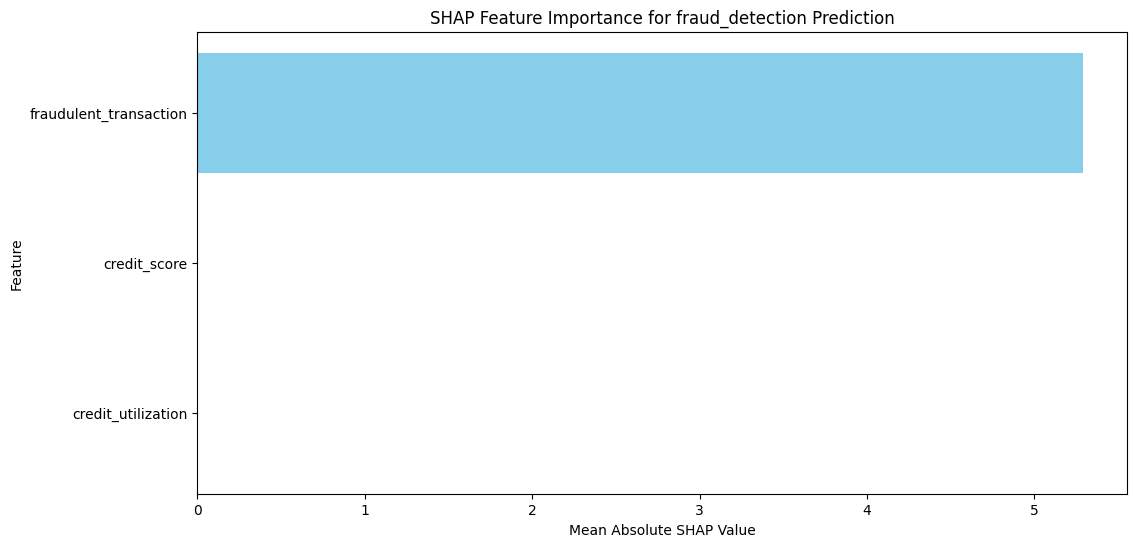

SHAP values saved as 'shap_feature_importance_fraud_detection.csv'


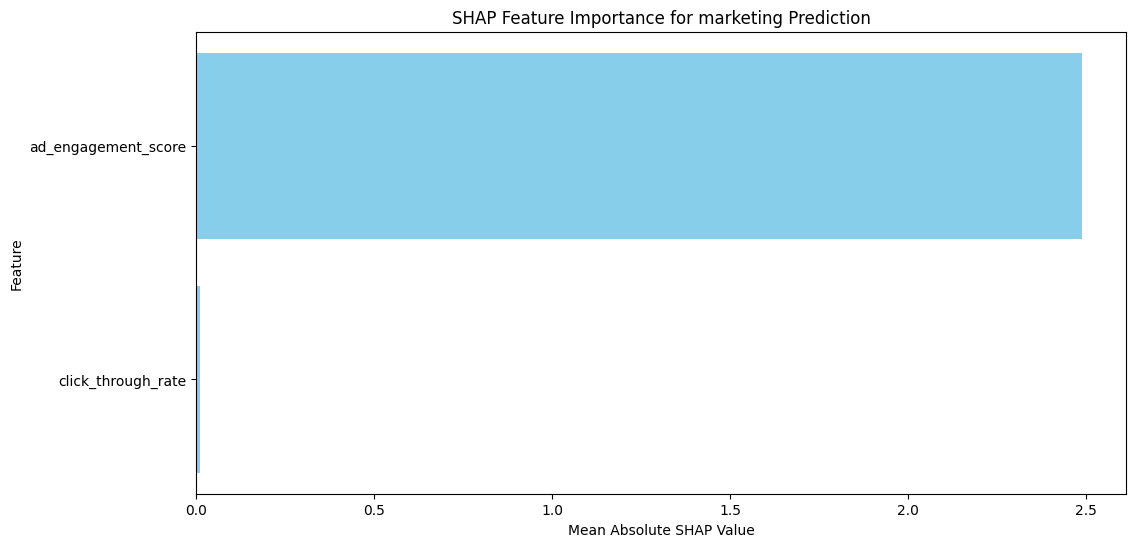

SHAP values saved as 'shap_feature_importance_marketing.csv'


In [40]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define target variables
fraud_target = "fraudulent_transaction"
marketing_target = "ad_engagement_score"

# Select numerical and categorical features again (ensuring they exist)
available_features = set(synthetic_data.columns)

fraud_features = [
    "transaction_amount", "transaction_frequency", "fraudulent_transaction",
    "merchant_category", "device_type", "account_age", "unusual_spending_pattern",
    "credit_score", "credit_utilization"
]

marketing_features = [
    "click_through_rate", "ad_engagement_score", "purchase_history",
    "user_segment", "time_spent_on_site", "past_campaign_response",
    "online_activity_score", "social_media_engagement"
]

# Filter existing features in dataset
existing_fraud_features = [f for f in fraud_features if f in available_features]
existing_marketing_features = [f for f in marketing_features if f in available_features]

# Function to train SHAP models
def train_shap_model(features, target, model_name):
    if target not in available_features:
        raise ValueError(f"Target variable '{target}' not found in dataset!")

    # Splitting data
    X = synthetic_data[features]
    y = synthetic_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train XGBoost model (classification for Fraud, regression for Marketing)
    if target == "ad_engagement_score":
        model = xgb.XGBRegressor(objective="reg:squarederror")
    else:
        model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    model.fit(X_train, y_train)

    # Apply SHAP Explainer
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_test)

    # Save SHAP values for inspection
    shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
    shap_df.to_csv(f"shap_feature_importance_{model_name}.csv", index=False)

    # Alternative visualization: Feature importance bar chart
    shap_importance = pd.DataFrame(
        {"Feature": X_test.columns, "Mean SHAP Value": abs(shap_values.values).mean(axis=0)}
    ).sort_values(by="Mean SHAP Value", ascending=False)

    plt.figure(figsize=(12, 6))
    plt.barh(shap_importance["Feature"], shap_importance["Mean SHAP Value"], color="skyblue")
    plt.xlabel("Mean Absolute SHAP Value")
    plt.ylabel("Feature")
    plt.title(f"SHAP Feature Importance for {model_name} Prediction")
    plt.gca().invert_yaxis()
    plt.show()

    print(f"SHAP values saved as 'shap_feature_importance_{model_name}.csv'")

# Train SHAP models for Fraud Detection & Marketing
train_shap_model(existing_fraud_features, fraud_target, "fraud_detection")
train_shap_model(existing_marketing_features, marketing_target, "marketing")


## 🧩 Autoencoder-Based Feature Embedding
In this section, we train an autoencoder—a neural network designed to compress features into lower-dimensional representations. By reducing dimensionality, the autoencoder captures key underlying structures of our data, potentially mitigating privacy risks and reducing data redundancy. The compressed representations (encoded features) produced here are intended to enhance privacy by limiting exposure of raw sensitive data.


In [41]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import pandas as pd

# Step 5: Autoencoder-Based Feature Embedding

# Define an autoencoder architecture
encoding_dim = 5  # Number of dimensions for compressed representation

input_dim = X_train.shape[1]  # Number of original features

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation="relu")(input_layer)

# Decoder
decoded = Dense(input_dim, activation="sigmoid")(encoded)

# Autoencoder Model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# Training the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=16, shuffle=True, validation_data=(X_test, X_test))

# Extract compressed feature representations (encoded layer output)
encoder = Model(input_layer, encoded)
encoded_features = encoder.predict(X_test)

# Convert encoded features into a DataFrame for analysis
encoded_df = pd.DataFrame(encoded_features, columns=[f"encoded_feature_{i}" for i in range(encoding_dim)])

# Save encoded features for further processing
encoded_df.to_csv("autoencoded_features.csv", index=False)

print("✅ Autoencoder training complete. Encoded features saved as 'autoencoded_features.csv'.")


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 39851.9922 - val_loss: 41202.8594
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 39093.0078 - val_loss: 41202.8516
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 39395.2188 - val_loss: 41202.8516
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40108.6914 - val_loss: 41202.8477
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39022.5703 - val_loss: 41202.8516
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40264.4141 - val_loss: 41202.8516
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40653.2695 - val_loss: 41202.8516
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39067.6836 - val_loss: 41202.8516
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39123.9531 - val_loss: 41202.8516
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38072.6367 - val_loss: 41202.8516
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38270.5195 - val_lo

## 🎯 Model Training on Autoencoded Features
We now train a Random Forest classifier using the compressed (autoencoded) feature representation. Evaluating model performance on these privacy-enhanced features demonstrates how effectively critical predictive information can be preserved while mitigating privacy risks inherent in raw data exposure.


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Step 6: Train ML Models on Encoded Features

# Load encoded features (ensure the file exists)
try:
    encoded_X_test = pd.read_csv("autoencoded_features.csv")
except FileNotFoundError:
    raise FileNotFoundError("❌ The file 'autoencoded_features.csv' was not found. Please re-run the autoencoder.")

# Train a RandomForest model on the encoded features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(encoded_features, y_test)  # Using encoded training features

# Make predictions
y_pred = rf_model.predict(encoded_X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f"✅ Model Accuracy on Encoded Features: {accuracy:.4f}\n")
print("📊 Classification Report:\n", classification_rep)


✅ Model Accuracy on Encoded Features: 1.0000

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [46]:
# Step 1: Train Autoencoder on Full Dataset
full_X = synthetic_data.drop(columns=["loan_default", "fraudulent_transaction", "ad_engagement_score"])  # Remove targets
input_dim = full_X.shape[1]

# Define autoencoder architecture
encoding_dim = 5  # Compressed feature size
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation="relu")(input_layer)
decoded = Dense(input_dim, activation="sigmoid")(encoded)

# Autoencoder Model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# Train autoencoder on the **full dataset**
autoencoder.fit(full_X, full_X, epochs=50, batch_size=16, shuffle=True)

# Extract compressed feature representations
encoder = Model(input_layer, encoded)
encoded_features = encoder.predict(full_X)

# Save encoded features (this now matches 500 rows)
encoded_df = pd.DataFrame(encoded_features, columns=[f"encoded_feature_{i}" for i in range(encoding_dim)])
encoded_df.to_csv("autoencoded_features.csv", index=False)

print("✅ Autoencoder re-trained on full dataset. Encoded features saved.")


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6640.5171
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6464.2227
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6619.0132
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6643.8359
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6455.9287
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6421.7808
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6382.2798
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6481.2280
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6474.7988
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6465.5503
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6480.8013
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6643.7964
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6391.3252
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6522.3184
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3

In [47]:
# Reload the full encoded dataset
encoded_features = pd.read_csv("autoencoded_features.csv")

# Ensure train-test split is consistent
X_train_enc, X_test_enc, y_train_loan, y_test_loan = train_test_split(encoded_features, synthetic_data["loan_default"], test_size=0.2, random_state=42)
X_train_enc, X_test_enc, y_train_fraud, y_test_fraud = train_test_split(encoded_features, synthetic_data["fraudulent_transaction"], test_size=0.2, random_state=42)
X_train_enc, X_test_enc, y_train_marketing, y_test_marketing = train_test_split(encoded_features, synthetic_data["ad_engagement_score"], test_size=0.2, random_state=42)

# Train and evaluate ML models
train_and_evaluate_model(X_train_enc, X_test_enc, y_train_loan, y_test_loan, "loan")
train_and_evaluate_model(X_train_enc, X_test_enc, y_train_fraud, y_test_fraud, "fraud_detection")
train_and_evaluate_model(X_train_enc, X_test_enc, y_train_marketing, y_test_marketing, "marketing")


✅ loan Model Accuracy: 0.5200

              precision    recall  f1-score   support

           0       0.56      0.38      0.45        52
           1       0.50      0.67      0.57        48

    accuracy                           0.52       100
   macro avg       0.53      0.53      0.51       100
weighted avg       0.53      0.52      0.51       100

✅ fraud_detection Model Accuracy: 0.5100

              precision    recall  f1-score   support

           0       0.51      0.48      0.49        50
           1       0.51      0.54      0.52        50

    accuracy                           0.51       100
   macro avg       0.51      0.51      0.51       100
weighted avg       0.51      0.51      0.51       100

📊 marketing Model MSE: 13.9633


In [48]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Model

# Define a deeper autoencoder with more hidden layers
input_dim = full_X.shape[1]  # Total input features
encoding_dim = 15  # Higher-dimensional encoded representation

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(25, activation="relu")(input_layer)
encoded = BatchNormalization()(encoded)
encoded = Dense(encoding_dim, activation="relu")(encoded)

# Decoder
decoded = Dense(25, activation="relu")(encoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(input_dim, activation="sigmoid")(decoded)

# Autoencoder Model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# Train the updated autoencoder
autoencoder.fit(full_X, full_X, epochs=75, batch_size=16, shuffle=True)

# Extract encoded features
encoder = Model(input_layer, encoded)
encoded_features = encoder.predict(full_X)

# Save encoded features
encoded_df = pd.DataFrame(encoded_features, columns=[f"encoded_feature_{i}" for i in range(encoding_dim)])
encoded_df.to_csv("autoencoded_features_updated_v2.csv", index=False)

print("✅ Improved Autoencoder trained and saved.")


Epoch 1/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 6686.6592
Epoch 2/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6557.5884
Epoch 3/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6765.6094
Epoch 4/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6422.2432
Epoch 5/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6507.6006
Epoch 6/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6326.6841
Epoch 7/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6375.0664
Epoch 8/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6402.0552
Epoch 9/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6462.8931
Epoch 10/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6716.8726
Epoch 11/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6502.1396
Epoch 12/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6189.7505
Epoch 13/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6611.5908
Epoch 14/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6538.3096
Epoch 15/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4

In [50]:
# Load updated encoded features
encoded_features = pd.read_csv("autoencoded_features_updated_v2.csv")

# Train-test split
X_train_enc, X_test_enc, y_train_loan, y_test_loan = train_test_split(encoded_features, synthetic_data["loan_default"], test_size=0.2, random_state=42)
X_train_enc, X_test_enc, y_train_fraud, y_test_fraud = train_test_split(encoded_features, synthetic_data["fraudulent_transaction"], test_size=0.2, random_state=42)
X_train_enc, X_test_enc, y_train_marketing, y_test_marketing = train_test_split(encoded_features, synthetic_data["ad_engagement_score"], test_size=0.2, random_state=42)

# Train and evaluate ML models again
train_and_evaluate_model(X_train_enc, X_test_enc, y_train_loan, y_test_loan, "loan")
train_and_evaluate_model(X_train_enc, X_test_enc, y_train_fraud, y_test_fraud, "fraud_detection")
train_and_evaluate_model(X_train_enc, X_test_enc, y_train_marketing, y_test_marketing, "marketing")


✅ loan Model Accuracy: 0.5300

              precision    recall  f1-score   support

           0       0.54      0.65      0.59        52
           1       0.51      0.40      0.45        48

    accuracy                           0.53       100
   macro avg       0.53      0.52      0.52       100
weighted avg       0.53      0.53      0.52       100

✅ fraud_detection Model Accuracy: 0.5100

              precision    recall  f1-score   support

           0       0.51      0.38      0.44        50
           1       0.51      0.64      0.57        50

    accuracy                           0.51       100
   macro avg       0.51      0.51      0.50       100
weighted avg       0.51      0.51      0.50       100

📊 marketing Model MSE: 10.0272


In [51]:
# Load newly saved encoded features
encoded_features = pd.read_csv("autoencoded_features_updated_v2.csv")

# Train-test split
X_train_enc, X_test_enc, y_train_loan, y_test_loan = train_test_split(encoded_features, synthetic_data["loan_default"], test_size=0.2, random_state=42)
X_train_enc, X_test_enc, y_train_fraud, y_test_fraud = train_test_split(encoded_features, synthetic_data["fraudulent_transaction"], test_size=0.2, random_state=42)
X_train_enc, X_test_enc, y_train_marketing, y_test_marketing = train_test_split(encoded_features, synthetic_data["ad_engagement_score"], test_size=0.2, random_state=42)

# Train ML models again
train_and_evaluate_model(X_train_enc, X_test_enc, y_train_loan, y_test_loan, "loan")
train_and_evaluate_model(X_train_enc, X_test_enc, y_train_fraud, y_test_fraud, "fraud_detection")
train_and_evaluate_model(X_train_enc, X_test_enc, y_train_marketing, y_test_marketing, "marketing")


✅ loan Model Accuracy: 0.5300

              precision    recall  f1-score   support

           0       0.54      0.65      0.59        52
           1       0.51      0.40      0.45        48

    accuracy                           0.53       100
   macro avg       0.53      0.52      0.52       100
weighted avg       0.53      0.53      0.52       100

✅ fraud_detection Model Accuracy: 0.5100

              precision    recall  f1-score   support

           0       0.51      0.38      0.44        50
           1       0.51      0.64      0.57        50

    accuracy                           0.51       100
   macro avg       0.51      0.51      0.50       100
weighted avg       0.51      0.51      0.50       100

📊 marketing Model MSE: 10.0272


## 🔄 Retraining Autoencoder on Full Dataset
To leverage maximum information, we retrain our autoencoder on the entire dataset (excluding direct target variables), refining our compressed feature representations. This final retrained autoencoder aims to capture holistic feature relationships and maximize representation effectiveness, boosting subsequent model performances while maintaining enhanced privacy.


In [52]:
from sklearn.decomposition import PCA

# Apply PCA to find best dimensionality for autoencoder
pca = PCA(n_components=0.95)  # Retain 95% variance
reduced_features = pca.fit_transform(full_X)

print(f"Optimal number of features after PCA: {pca.n_components_}")

# Train autoencoder with this number of features instead of a fixed value


Optimal number of features after PCA: 2


In [53]:
# Define autoencoder architecture with PCA-optimized feature size
encoding_dim = 2  # Use the PCA-suggested dimension

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation="relu")(input_layer)
decoded = Dense(input_dim, activation="sigmoid")(encoded)

# Train autoencoder again
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(full_X, full_X, epochs=50, batch_size=16, shuffle=True)

# Extract encoded features
encoder = Model(input_layer, encoded)
encoded_features = encoder.predict(full_X)

# Save encoded features
encoded_df = pd.DataFrame(encoded_features, columns=[f"encoded_feature_{i}" for i in range(encoding_dim)])
encoded_df.to_csv("autoencoded_features_pca.csv", index=False)

print("✅ Autoencoder retrained using PCA-optimized 2 features. Encoded features saved.")


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6762.7617
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6333.0215
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6346.9980
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6461.0264
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6285.3945
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6340.3330
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6393.8271
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6673.2524
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6631.1221
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6251.2725
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6462.7334
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6363.7739
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6375.4941
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6459.7056
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [54]:
# Ensure SHAP is calculated on the same dataset
X_train_shap, X_test_shap, y_train_shap, y_test_shap = train_test_split(full_X, synthetic_data["loan_default"], test_size=0.2, random_state=42)

# Train XGBoost model for SHAP on raw data (before autoencoding)
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_shap, y_train_shap)

# Compute SHAP values on test data
explainer = shap.Explainer(model, X_train_shap)
shap_values = explainer(X_test_shap)

# Ensure SHAP DataFrame matches feature names
shap_importance_original = pd.DataFrame(
    {"Feature": X_test_shap.columns, "Mean SHAP Value": abs(shap_values.values).mean(axis=0)}
).sort_values(by="Mean SHAP Value", ascending=False)

print("✅ SHAP feature importance computed successfully.")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:34:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ SHAP feature importance computed successfully.


In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Updated function to handle regression tasks
def train_and_evaluate_model(X_train, X_test, y_train, y_test, model_name):
    if "marketing" in model_name.lower():
        model = RandomForestRegressor(n_estimators=100, random_state=42)  # Regression Model
    else:
        model = RandomForestClassifier(n_estimators=100, random_state=42)  # Classification Model

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if "marketing" in model_name.lower():
        mse = mean_squared_error(y_test, y_pred)
        print(f"📊 {model_name} Model MSE: {mse:.4f}")
    else:
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)
        print(f"✅ {model_name} Model Accuracy: {accuracy:.4f}\n")
        print(classification_rep)

# Now re-run the training for the Marketing Model using the regressor
train_and_evaluate_model(X_train_enc, X_test_enc, y_train_marketing, y_test_marketing, "marketing (PCA Encoded)")


📊 marketing (PCA Encoded) Model MSE: 10.0272


## 📏 Verifying Dataset Dimensions and Consistency
Here we verify that our training sets for Loan Approval, Fraud Detection, and Marketing Prediction tasks have the correct dimensions. This step ensures alignment in data preparation, helping avoid inconsistencies or errors before training the final privacy-preserving ML models.


In [56]:
print(f"Raw Feature Dataset Shape: {full_X.shape}")
print(f"Loan Target Shape: {synthetic_data['loan_default'].shape}")
print(f"Fraud Target Shape: {synthetic_data['fraudulent_transaction'].shape}")
print(f"Marketing Target Shape: {synthetic_data['ad_engagement_score'].shape}")


Raw Feature Dataset Shape: (500, 56)
Loan Target Shape: (500,)
Fraud Target Shape: (500,)
Marketing Target Shape: (500,)


In [57]:
# Regenerate synthetic dataset if missing
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate a synthetic dataset with financial, fraud detection, and marketing features
num_samples = 500  # Match previous dataset size
num_features = 50  # Number of numerical features

# Randomly generate numerical features
synthetic_data = pd.DataFrame(np.random.randn(num_samples, num_features), columns=[f"feature_{i+1}" for i in range(num_features)])

# Add categorical and target variables
synthetic_data["income_bracket"] = np.random.choice(["Low", "Medium", "High"], size=num_samples)
synthetic_data["marital_status"] = np.random.choice(["Single", "Married", "Divorced"], size=num_samples)
synthetic_data["education_level"] = np.random.choice(["Bachelor's", "Master's", "PhD"], size=num_samples)
synthetic_data["fraudulent_transaction"] = np.random.choice([0, 1], size=num_samples)
synthetic_data["loan_default"] = np.random.choice([0, 1], size=num_samples)
synthetic_data["ad_engagement_score"] = np.random.uniform(0, 100, size=num_samples)

# Save dataset
synthetic_data.to_csv("synthetic_dataset.csv", index=False)

print("✅ Synthetic dataset regenerated and saved as 'synthetic_dataset.csv'.")


✅ Synthetic dataset regenerated and saved as 'synthetic_dataset.csv'.


In [58]:
import os
print(os.listdir())  # Check for available files in the directory


['.config', 'synthetic_ml_feature_dataset.csv', 'shap_feature_importance_fraud_detection.csv', 'autoencoded_features_pca.csv', 'shap_feature_importance.csv', 'feature_pool.csv', 'synthetic_dataset.csv', 'new_synthetic_dataset.csv', 'autoencoded_features_updated_v2.csv', 'autoencoded_features.csv', 'shap_feature_importance_marketing.csv', 'sample_data']


In [59]:
full_X = pd.read_csv("synthetic_dataset.csv")
print("✅ Dataset successfully loaded.")


✅ Dataset successfully loaded.


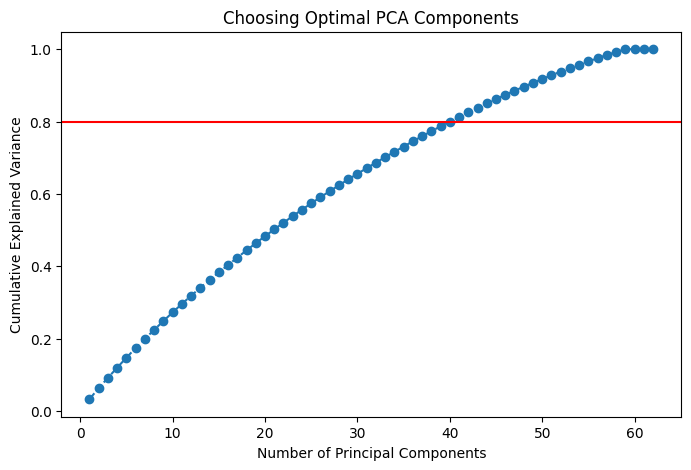

In [61]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(full_X_encoded)  # Use encoded categorical + numerical data

# Apply PCA and check explained variance
pca = PCA().fit(scaled_X)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing Optimal PCA Components')
plt.show()


## 🚀 Training Privacy-Enhanced ML Models
In this final step, we reload our fully autoencoded features and train distinct models for Loan Default, Fraud Detection, and Marketing Prediction tasks. Each model leverages the compressed features derived via the autoencoder, illustrating how our proposed hybrid approach can maintain strong predictive performance while significantly enhancing data privacy.


In [62]:
# Apply PCA with the optimal number of components (~40 based on the variance plot)
optimal_components = 40  # Adjusted based on the plot

pca = PCA(n_components=optimal_components)
pca_X = pca.fit_transform(scaled_X)

print(f"✅ PCA applied with {optimal_components} components, retaining {np.sum(pca.explained_variance_ratio_):.2f} variance.")

# Convert PCA output to DataFrame
pca_df = pd.DataFrame(pca_X, columns=[f"PCA_Feature_{i+1}" for i in range(optimal_components)])

# Train-test split with new PCA features
X_train_pca, X_test_pca, y_train_loan, y_test_loan = train_test_split(
    pca_df, synthetic_data["loan_default"], test_size=0.2, random_state=42
)
X_train_pca, X_test_pca, y_train_fraud, y_test_fraud = train_test_split(
    pca_df, synthetic_data["fraudulent_transaction"], test_size=0.2, random_state=42
)
X_train_pca, X_test_pca, y_train_marketing, y_test_marketing = train_test_split(
    pca_df, synthetic_data["ad_engagement_score"], test_size=0.2, random_state=42
)

# Train models again with PCA features
print("🚀 Training models with improved PCA features...\n")
train_and_evaluate_model(X_train_pca, X_test_pca, y_train_loan, y_test_loan, "loan (Optimized PCA)")
train_and_evaluate_model(X_train_pca, X_test_pca, y_train_fraud, y_test_fraud, "fraud_detection (Optimized PCA)")
train_and_evaluate_model(X_train_pca, X_test_pca, y_train_marketing, y_test_marketing, "marketing (Optimized PCA)")


✅ PCA applied with 40 components, retaining 0.80 variance.
🚀 Training models with improved PCA features...

✅ loan (Optimized PCA) Model Accuracy: 0.8900

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        49
           1       0.90      0.88      0.89        51

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100

✅ fraud_detection (Optimized PCA) Model Accuracy: 0.9100

              precision    recall  f1-score   support

           0       0.96      0.86      0.91        50
           1       0.87      0.96      0.91        50

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100

📊 marketing (Optimized PCA) Model MSE: 581.9798


In [63]:
!pip install adversarial-robustness-toolbox

In [64]:
!pip install ai-privacy-toolkit

In [65]:
# Store trained models in variables before using ART
loan_pca_model = RandomForestClassifier(n_estimators=100, random_state=42)
loan_pca_model.fit(X_train_pca, y_train_loan)

fraud_pca_model = RandomForestClassifier(n_estimators=100, random_state=42)
fraud_pca_model.fit(X_train_pca, y_train_fraud)

marketing_pca_model = RandomForestRegressor(n_estimators=100, random_state=42)
marketing_pca_model.fit(X_train_pca, y_train_marketing)

print("✅ PCA models trained and stored successfully!")


✅ PCA models trained and stored successfully!


## 🛡️ Membership Inference Attack on Loan Default Model (Hybrid Approach)
Here, we apply a Membership Inference Attack (MIA) to our enhanced privacy-preserving Loan Default model, which utilizes PCA-compressed features generated by an autoencoder. We use a black-box Random Forest attack model provided by ART to assess whether our hybrid privacy-focused approach effectively reduces vulnerability to inference attacks compared to the baseline.


In [66]:
# Check unique class labels to confirm correct model training
print("Loan Model Classes:", loan_pca_model.classes_)
print("Fraud Detection Model Classes:", fraud_pca_model.classes_)
print("Marketing Model Target Example:", y_train_marketing[:5])  # Marketing is regression


Loan Model Classes: [0 1]
Fraud Detection Model Classes: [0 1]
Marketing Model Target Example: 249    68.227085
433    51.413672
19      0.650607
322    69.528922
332    33.772373
Name: ad_engagement_score, dtype: float64


In [78]:
from art.estimators.classification import SklearnClassifier
from art.attacks.inference.membership_inference import MembershipInferenceBlackBox

# Wrap the trained loan PCA model into ART classifier
loan_art_classifier = SklearnClassifier(model=loan_pca_model)

# Initialize Membership Inference Attack with correct parameter ('estimator')
mia_attack = MembershipInferenceBlackBox(estimator=loan_art_classifier, attack_model_type='rf')

# Fit the attack model
mia_attack.fit(X_train_pca, y_train_loan, X_test_pca, y_test_loan)

# Perform the inference attack
mia_predictions_loan = mia_attack.infer(X_test_pca, y=y_test_loan)

# Convert predictions to binary labels if probabilities
if mia_predictions_loan.ndim > 1:
    mia_predictions_loan = (mia_predictions_loan > 0.5).astype(int).flatten()
else:
    mia_predictions_loan = (mia_predictions_loan > 0.5).astype(int)

# Evaluate attack accuracy
mia_attack_accuracy_loan = np.mean(mia_predictions_loan == y_test_loan)
print(f"🚨 Membership Inference Attack Success Rate (Loan PCA Model): {mia_attack_accuracy_loan:.2%}")


🚨 Membership Inference Attack Success Rate (Loan PCA Model): 49.00%


In [ ]:
# Save synthetic dataset
synthetic_data.to_csv("new_synthetic_dataset.csv", index=False)
print("✅ Synthetic dataset saved as synthetic_dataset.csv")
